## Raw Corpus Analysis
corpus = API tweets 01.01.2010-01.05.2023; categories: http, regular, spam

1. load API_all_tweets
2. create different time columns
3. plot monthly tweets since 2010
4. plot monthly tweets since 2010 by category 

6. plot daily tweets since 2022 by category
7. plot daily tweets since 2022 input_corpus (only http + regular)
8. plot weekly tweets since 2022 input_corpus (only http + regular)


In [1]:
import pandas as pd
import sys, importlib
from collections import Counter
import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np 
sys.path.append('../modules/')

In [2]:
# Change variables
spam = "Spam"
http = "enthält URL"
regular = "Regulär"

In [3]:
corpus = pd.read_csv('../data/tweets_df.csv', sep=';', encoding="utf-8-sig", lineterminator='\n', keep_default_na=False)
# tweets raw = 452.914
# tweets spam = 210.962
# tweets http = 136.408
# tweets regular = 105.544
# tweets corpus input (2022-05.2023) = 136.837

In [4]:
# rename column category
corpus.rename(columns={'category\r': 'category'}, inplace=True)

# replace category names
corpus['category'] = corpus['category'].replace('spam\r', f'{spam}')
corpus['category'] = corpus['category'].replace('http\r', f'{http}')
corpus['category'] = corpus['category'].replace('regular\r', f'{regular}')

In [5]:
# count number of duplicates in category spam
spam_df= corpus[corpus['category'] == f'{spam}']
spam_df = spam_df.groupby(['content_short']).size().reset_index(name='counts')

In [7]:
# aggregate all tweets per month
corpus['datetime'] = pd.to_datetime(corpus['datetime'])
corpus['year_month'] = corpus['datetime'].dt.strftime('%Y-%m')
corpus_per_month = corpus.groupby(['year_month']).size().reset_index(name="count")

In [36]:
# count unique users in corpus
unique_users = corpus_2022['username'].nunique()
print(f'Number of unique users in corpus_2022: {unique_users}')

# count verified users for unique users in corpus
verified_users = corpus_2022[corpus_2022['verified'] == True]['username'].nunique()


print(f'Number of verified users in corpus_2022: {verified_users}')


# possible sensitive tweets
#sensitive_tweets = corpus_2022[corpus['possibly_sensitive'] == True]


Number of unique users in corpus_2022: 53148
Number of verified users in corpus_2022: 2101


In [125]:
# print percentage of tweets in category spam before 2019
DATE = '2016-01'
print(f"Percentage of tweets in category {regular} before {DATE}: {round((len(corpus[(corpus['category'] == regular) & (corpus['year_month'] < f'{DATE}')]) / len(corpus[corpus['category'] == regular])) * 100, 2)}%")
print(f"Percentage of tweets in category {regular} after {DATE}: {round((len(corpus[(corpus['category'] == regular) & (corpus['year_month'] > f'{DATE}')]) / len(corpus[corpus['category'] == regular])) * 100, 2)}%")
print(f"Percentage of tweets in category {regular} of the whole corpus before {DATE}: {round((len(corpus[(corpus['category'] == regular) & (corpus['year_month'] < f'{DATE}')]) / len(corpus)) * 100, 2)}%")
print(f"Percentage of tweets in category {regular} of the whole corpus after {DATE}: {round((len(corpus[(corpus['category'] == regular) & (corpus['year_month'] > f'{DATE}')]) / len(corpus)) * 100, 2)}%")


print(f"Percentage of tweets in category {http} before {DATE}: {round((len(corpus[(corpus['category'] == http) & (corpus['year_month'] < f'{DATE}')]) / len(corpus[corpus['category'] == http])) * 100, 2)}%")
print(f"Percentage of tweets in category {http} after {DATE}: {round((len(corpus[(corpus['category'] == http) & (corpus['year_month'] > f'{DATE}')]) / len(corpus[corpus['category'] == http])) * 100, 2)}%")
print(f"Percentage of tweets in category {http} of the whole corpus before {DATE}: {round((len(corpus[(corpus['category'] == http) & (corpus['year_month'] < f'{DATE}')]) / len(corpus)) * 100, 2)}%")
print(f"Percentage of tweets in category {http} of the whole corpus after {DATE}: {round((len(corpus[(corpus['category'] == http) & (corpus['year_month'] > f'{DATE}')]) / len(corpus)) * 100, 2)}%")

print(f"Percentage of tweets in category {spam} before {DATE}: {round((len(corpus[(corpus['category'] == spam) & (corpus['year_month'] < f'{DATE}')]) / len(corpus[corpus['category'] == spam])) * 100, 2)}%")
print(f"Percentage of tweets in category {spam} after {DATE}: {round((len(corpus[(corpus['category'] == spam) & (corpus['year_month'] > f'{DATE}')]) / len(corpus[corpus['category'] == spam])) * 100, 2)}%")
print(f"Percentage of tweets in category {spam} of the whole corpus before {DATE}: {round((len(corpus[(corpus['category'] == spam) & (corpus['year_month'] < f'{DATE}')]) / len(corpus)) * 100, 2)}%")
print(f"Percentage of tweets in category {spam} of the whole corpus after {DATE}: {round((len(corpus[(corpus['category'] == spam) & (corpus['year_month'] > f'{DATE}')]) / len(corpus)) * 100, 2)}%")


#regular_before_2019 = corpus[(corpus['category'] == regular) & (corpus['year_month'] > f'{DATE}')]


Percentage of tweets in category Regulär before 2016-01: 6.53%
Percentage of tweets in category Regulär after 2016-01: 93.37%
Percentage of tweets in category Regulär of the whole corpus before 2016-01: 1.52%
Percentage of tweets in category Regulär of the whole corpus after 2016-01: 21.76%
Percentage of tweets in category enthält URL before 2016-01: 38.24%
Percentage of tweets in category enthält URL after 2016-01: 61.38%
Percentage of tweets in category enthält URL of the whole corpus before 2016-01: 11.52%
Percentage of tweets in category enthält URL of the whole corpus after 2016-01: 18.49%
Percentage of tweets in category Spam before 2016-01: 83.12%
Percentage of tweets in category Spam after 2016-01: 16.52%
Percentage of tweets in category Spam of the whole corpus before 2016-01: 38.72%
Percentage of tweets in category Spam of the whole corpus after 2016-01: 7.7%


In [8]:
# count all tweets
print(len(corpus[corpus['year_month'] < '2022-01']))
# count all tweets between 2016-01 and 2022-01
print(len(corpus[(corpus['year_month'] >= '2010-01') & (corpus['year_month'] < '2016-01')]))
print(len(corpus[(corpus['year_month'] >= '2016-01') & (corpus['year_month'] < '2022-01')]))
print(len(corpus[corpus['year_month'] >= '2022-01']))



305187
234400
70787
147727


In [10]:
A = corpus[(corpus['year_month'] >= '2010-01') & (corpus['year_month'] < '2016-01')]
B = corpus[(corpus['year_month'] >= '2016-01') & (corpus['year_month'] < '2022-01')]
C = corpus[corpus['year_month'] >= '2022-01']

# aggregate A per category
# A = A.groupby(['category']).size().reset_index(name="count")
# B = B.groupby(['category']).size().reset_index(name="count")
# C = C.groupby(['category']).size().reset_index(name="count")


In [127]:
corpus['year'] = corpus['datetime'].dt.strftime('%Y')
corpus_per_year = corpus.groupby(['year']).size().reset_index(name="count")
corpus_per_year['year'] = corpus_per_year['year'].astype(int)
# calculate mean tweets per year
mean_tweets_per_year = corpus_per_year['count'].mean()
# calculate mean tweets per year before 2022
mean_tweets_per_year_before_2022 = corpus_per_year[corpus_per_year['year'] < 2022]['count'].mean()
# calculate mean tweets per year after 2022
mean_tweets_per_year_after_2022 = corpus_per_year[corpus_per_year['year'] >= 2022]['count'].mean()
mean_tweets_per_year_after_2022_quarter = corpus_per_year[corpus_per_year['year'] >= 2022]['count'].sum()/1.25
# calculate mean tweets per year between 2016 and 2022
mean_tweets_per_year_between_2016_and_2022 = corpus_per_year[(corpus_per_year['year'] >= 2016) & (corpus_per_year['year'] < 2022)]['count'].mean()

print(f'Mean tweets per year: {round(mean_tweets_per_year, 2)}')
print(f'Mean tweets per year before 2022: {round(mean_tweets_per_year_before_2022, 2)}')
print(f'Mean tweets per year after 2022 (2 years): {round(mean_tweets_per_year_after_2022, 2)}')
print(f'Mean tweets per year after 2022 (1.25 years): {round(mean_tweets_per_year_after_2022_quarter, 2)}')

print(f'Mean tweets per year between 2016 and 2022: {round(mean_tweets_per_year_between_2016_and_2022, 2)}')

Mean tweets per year: 32351.0
Mean tweets per year before 2022: 25432.25
Mean tweets per year after 2022 (2 years): 73863.5
Mean tweets per year after 2022 (1.25 years): 118181.6
Mean tweets per year between 2016 and 2022: 11797.83


In [128]:
print(mean_tweets_per_year_after_2022*100/mean_tweets_per_year_before_2022)
print(mean_tweets_per_year_after_2022*100/mean_tweets_per_year_between_2016_and_2022)


290.43242339942395
626.0768220153418


In [106]:
# monthly mean of count of corpus_per_month_category with category regular and before 2019
DATE = '2011'

corpus_per_month_category_r = corpus_per_month_category[corpus_per_month_category['category'] == regular]
mean_count = corpus_per_month_category_r[(corpus_per_month_category_r['year_month'] < f'{DATE}')]['count'].mean()

print(f"Mean of count of tweets in category {regular} before {DATE}: {round(mean_count, 2)}")

Mean of count of tweets in category Regulär before 2011: 72.58


In [119]:
DATE_BEGINN = '2016'
DATE_END = '2022'
corpus_per_month_category_r = corpus_per_month_category[corpus_per_month_category['category'] == regular]
mean_count = corpus_per_month_category_r[(corpus_per_month_category_r['year_month'] > f'{DATE_BEGINN}') & (corpus_per_month_category_r['year_month'] < f'{DATE_END}')]['count'].mean()


print(f"Mean of count of tweets in category {regular} between {DATE_BEGINN} and {DATE_END}: {round(mean_count, 2)}")

Mean of count of tweets in category Regulär between 2016 and 2022: 245.49


In [7]:
# dataframe of yearly mean of corpus_per_month_category_r
corpus_per_month_category_r['year'] = corpus_per_month_category_r['year_month'].str[:4]
corpus_per_month_category_r['year'] = corpus_per_month_category_r['year'].astype(int)
corpus_per_month_category_r_yearly = corpus_per_month_category_r.groupby(['year']).mean().reset_index()
# rount to 2 decimals
corpus_per_month_category_r_yearly['count'] = corpus_per_month_category_r_yearly['count'].round(0)

NameError: name 'corpus_per_month_category_r' is not defined

In [ ]:
corpus_per_month_category_s = corpus_per_month_category[corpus_per_month_category['category'] == spam]

# dataframe of yearly mean of corpus_per_month_category_r
corpus_per_month_category_s['year'] = corpus_per_month_category_s['year_month'].str[:4]
corpus_per_month_category_s['year'] = corpus_per_month_category_s['year'].astype(int)
corpus_per_month_category_s_yearly = corpus_per_month_category_s.groupby(['year']).mean().reset_index()
# rount to 2 decimals
corpus_per_month_category_s_yearly['count'] = corpus_per_month_category_s_yearly['count'].round(0)

C:\Users\c.loschke\AppData\Local\Temp\ipykernel_28608\2070745730.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\c.loschke\AppData\Local\Temp\ipykernel_28608\2070745730.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# calculate number of tweets per year
corpus['year'] = corpus['datetime'].dt.strftime('%Y')
corpus_per_year = corpus.groupby(['year', 'category']).size().reset_index(name="count")
# calculate mean of count for the years before 2022
corpus_per_year_before_2022 = corpus_per_year[corpus_per_year['year'] < '2022']
corpus_per_year_before_2022_mean = corpus_per_year_before_2022.groupby(['category']).mean().reset_index()

In [41]:
# corpus 2022 ohne spam
corpus_2022 = corpus[corpus['datetime'] > '2022-01-01']
corpus_2022 = corpus_2022[corpus_2022['category'] != f'{spam}']

In [ ]:
# Count different parts of the corpus

# Anzahl Tweets regular je Jahr + Anteil regular Tweets vor und nach 2022 (oder 2019)


In [6]:
# 3. plot of tweets per month
fig = px.line(corpus_per_month, x="year_month", y="count", 
              #color='#1f77b4'
              )

# change colors of lines
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified")
fig.update_layout(title=f'Anzahl Tweets pro Monat', title_font_size=20)
fig.update_xaxes(title_text="", title_font=dict(size=15), nticks=20, tickfont=dict(size=15))
fig.update_yaxes(title_text="Tweets pro Monat", title_font=dict(size=15), nticks=10, tickfont=dict(size=15))

fig.show()
fig.write_html("../data/html_plots/plot_corpus_per_month.html")

In [7]:
# aggregate for tweets per category

#corpus_per_year_category = corpus.groupby([corpus["datetime"].dt.year, "category"]).size().reset_index(name="count")
corpus_per_month_category = corpus.groupby(['year_month', 'category']).size().reset_index(name="count")
corpus_per_day_category = corpus.groupby([corpus["date"], "category"]).size().reset_index(name="count")

In [8]:
# 4. plot tweets per month per category

fig = px.line(corpus_per_month_category, x="year_month", y="count", color="category", 
              #color_discrete_sequence=px.colors.qualitative.Plotly,
              #color_discrete_map={"spam": '#DE4A4A', "http": '#7f7f7f', "regular": '#1f77b4'}
              color_discrete_map= {f'{spam}': 'rgb(255,0,0)', f'{http}': '#7f7f7f', f'{regular}': 'rgb(0,0,255)'}
              )


fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified")
fig.update_layout(title=f'Anzahl Tweets pro Monat', title_font_size=20)
fig.update_xaxes(title_text="", title_font=dict(size=15), nticks=20, tickfont=dict(size=15))
fig.update_yaxes(title_text="Tweets pro Monat", title_font=dict(size=15), nticks=5, tickfont=dict(size=15))


# update layout of legend to make it more readable
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01,
    title='Kategorie',
    bgcolor="rgba(0,0,0,0)",
    font=dict(
        size=15
    )
))


fig.show()
fig.write_html("../data/html_plots/corpus_per_month_category.html")

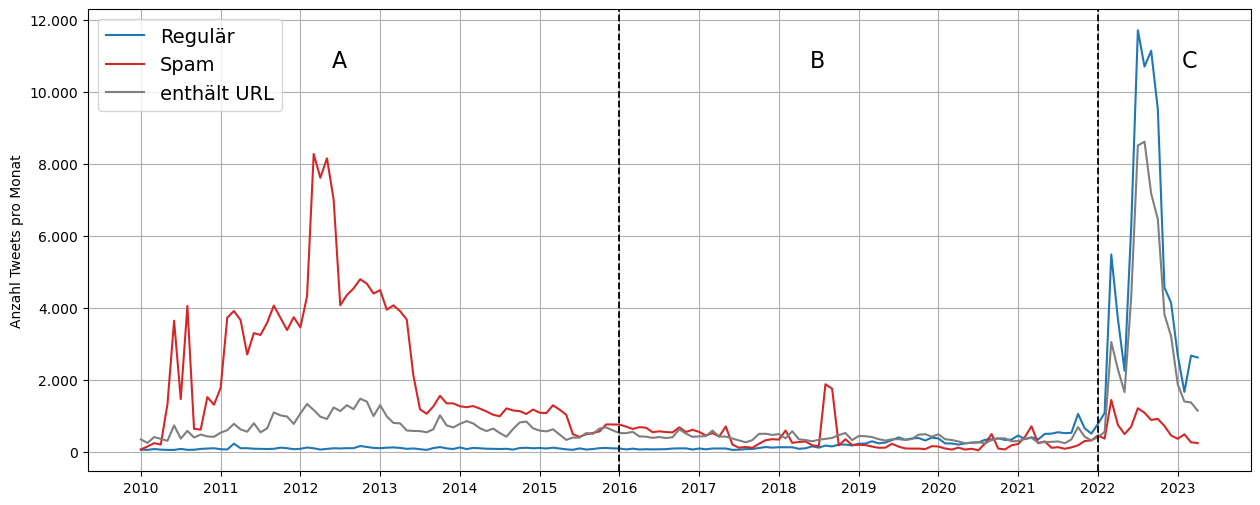

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
from matplotlib.ticker import FuncFormatter
# Set the locale to German
locale.setlocale(locale.LC_ALL, 'de_DE')

fig, ax = plt.subplots(figsize=(15, 6))

# Extracting the year from the year_month column - not necessary for this plot
#corpus_per_month_category['year'] = corpus_per_month_category['year_month'].str[:4]

# Generating unique colors for each category
color_discrete_map = {f'{http}': 'tab:gray', f'{regular}': 'tab:blue', f'{spam}': 'tab:red'}

# Plotting the data

for category in corpus_per_month_category['category'].unique():
    category_data = corpus_per_month_category[corpus_per_month_category['category'] == category]
    ax.plot(category_data['year_month'], category_data['count'], label=category, color=color_discrete_map[category])

# Setting x-axis tick labels
x_ticks = corpus_per_month_category['year_month'][::36]  # Selecting every 36th value
ax.set_xticks(x_ticks) #,rotation=90)
ax.set_xticklabels(x_ticks.str[:4])  # Displaying only the year

# Setting labels and title
#ax.set_xlabel('Year')
ax.set_ylabel('Anzahl Tweets pro Monat')
#ax.set_title('Tweets pro Monat und Kategorie')
# Format y-axis labels with thousands separator
def format_thousands(x, pos):
    return locale.format_string('%d', x, grouping=True)

ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))

# Adding a legend
#ax.legend()
legend = ax.legend(title='',loc='upper left', prop={'size': 14})
# Rotating x-axis tick labels for better readability (optional)
#plt.xticks(rotation=90)


# Adding vertical dotted lines
ax.axvline(x='2016-01', color='k', linestyle='--', linewidth=1.3)
ax.axvline(x='2022-01', color='k', linestyle='--', linewidth=1.3)


# Adding labels to each part
ax.text('2012-08', ax.get_ylim()[1] * 0.91, 'A', fontsize=16, ha='right', va='top')
ax.text('2018-08', ax.get_ylim()[1] * 0.91, 'B', fontsize=16, ha='right', va='top')
ax.text('2023-04', ax.get_ylim()[1] * 0.91, 'C', fontsize=16, ha='right', va='top')



ax.grid(True)

# Displaying the plot
plt.show()


In [54]:
# 6. plot daily tweets since 2022 by category

corpus_per_day_category_2022 = corpus_per_day_category[corpus_per_day_category['date'] >= '2022-01-01']
fig = px.line(corpus_per_day_category_2022, x="date", y="count", color="category", 
              #color_discrete_sequence=px.colors.qualitative.Plotly,
              #color_discrete_map={"spam": '#DE4A4A', "http": '#7f7f7f', "regular": '#1f77b4'}
              color_discrete_map= {f'{spam}': 'rgb(255,0,0)', f'{http}': '#7f7f7f', f'{regular}': 'rgb(0,0,255)'}
              )

# change colors of lines
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified")
fig.update_layout(title=f'Anzahl Tweets pro Tag 2022-2023', title_font_size=20)
fig.update_xaxes(title_text="", title_font=dict(size=15), nticks=20, tickfont=dict(size=15))
fig.update_yaxes(title_text="Tweets pro Tag", title_font=dict(size=15), nticks=5, tickfont=dict(size=15))


# update layout of legend to make it more readable
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01,
    title='Kategorie',
    bgcolor="rgba(0,0,0,0)",
    font=dict(
        size=15
    )
))


fig.show()
fig.write_html("../data/html_plots/corpus_per_day_category_2022.html")


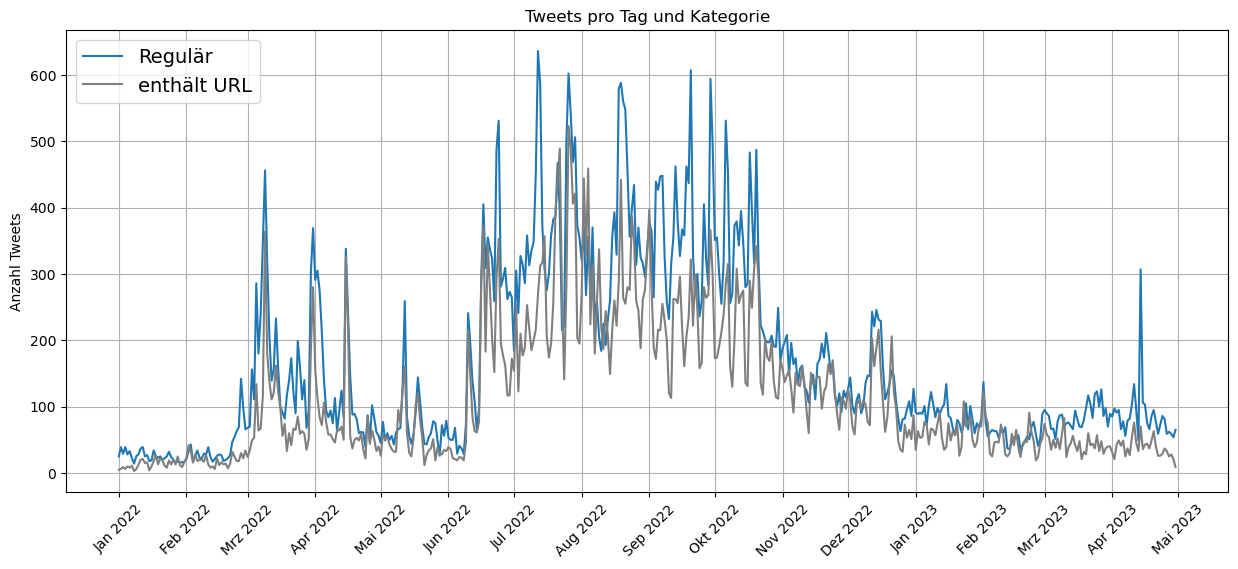

In [19]:
from matplotlib.dates import MonthLocator, DateFormatter
import locale
from matplotlib.ticker import FuncFormatter

# Set the locale to German
locale.setlocale(locale.LC_TIME, 'de_DE')

fig, ax = plt.subplots(figsize=(15, 6))

corpus_per_day_category_2022 = corpus_2022.groupby([corpus_2022["date"], "category"]).size().reset_index(name="count")
# Convert the 'date' column to a datetime object
corpus_per_day_category_2022['date'] = pd.to_datetime(corpus_per_day_category_2022['date'])

# Generating unique colors for each category
color_discrete_map = {f'{http}': 'tab:gray', f'{regular}': 'tab:blue'}

# Plotting the data

for category in corpus_per_day_category_2022['category'].unique():
    category_data = corpus_per_day_category_2022[corpus_per_day_category_2022['category'] == category]
    ax.plot(category_data['date'], category_data['count'], label=category, color=color_discrete_map[category])

# Setting x-axis tick labels
# Set the x-ticks to the first day of each month
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Setting labels and title
#ax.set_xlabel('Year')
ax.set_ylabel('Anzahl Tweets')
ax.set_title('Tweets pro Tag und Kategorie')

# Adding a legend
#ax.legend()
legend = ax.legend(title='',loc='upper left', prop={'size': 14})
# Rotating x-axis tick labels for better readability (optional)

ax.grid(True)

# Displaying the plot
plt.show()

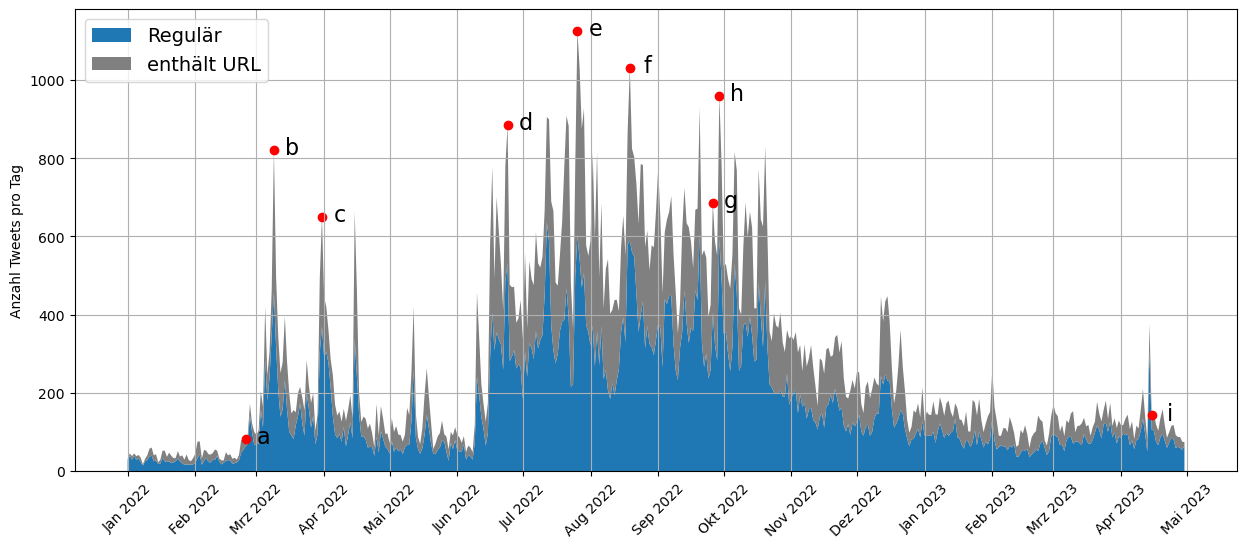

In [78]:

fig, ax = plt.subplots(figsize=(15, 6))

# Plot areas
colors = ['tab:blue', 'gray', 'tab:red']
# Plot line graph
#ax.plot(frame_data["week_year"], frame_data["percentage"])

corpus_per_day_category_2022_pivot = corpus_per_day_category_2022.groupby(['date', 'category'])['count'].sum().unstack()
corpus_per_day_category_2022_pivot.reset_index(inplace=True)

ax.stackplot(corpus_per_day_category_2022_pivot['date'], corpus_per_day_category_2022_pivot['Regulär'], corpus_per_day_category_2022_pivot['enthält URL'], labels=['Regulär', 'enthält URL'], colors=colors)


# Setting x-axis tick labels
# Set the x-ticks to the first day of each month
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Setting labels and title
#ax.set_xlabel('Year')
ax.set_ylabel('Anzahl Tweets pro Tag')
#ax.set_title('Tägliche Tweets pro Kategorie')


# Add vertical lines at event dates
import sys, importlib
importlib.reload(sys.modules['events'])
from events import event_list
# Add red dots for events
event_dates = [event[0] for event in event_list]
event_descriptions = [event[1] for event in event_list]
event_counts = [corpus_per_day_2022.loc[corpus_per_day_2022['date'] == date, 'count'].values[0] for date in event_dates]
ax.scatter(event_dates, event_counts, c='red')

# Add labels for events
for i, date in enumerate(event_dates):
    count = event_counts[i]
    ax.annotate(chr(ord('a') + i), (date, count), xytext=(13, 10), textcoords='offset points', fontsize=16,ha='center', va='top', color='black')



# Adding a legend
#ax.legend()
legend = ax.legend(title='',loc='upper left', prop={'size': 14})
# Rotating x-axis tick labels for better readability (optional)

ax.grid(True)

# Displaying the plot
plt.show()

In [38]:
# courpus per day category 2022['sum'] per day
corpus_per_day_category_2022['sum'] = corpus_per_day_category_2022.groupby(['date'])['count'].transform('sum')
corpus_per_day_category_2022['percentage'] = corpus_per_day_category_2022['count'] / corpus_per_day_category_2022['sum'] * 100

In [76]:
# calcluate mean of corpus_per_day_category_2022['percentage'] where category is regular
print(corpus_per_day_category_2022[corpus_per_day_category_2022['category'] == regular]['percentage'].mean())
print(corpus_per_day_category_2022[corpus_per_day_category_2022['category'] == http]['percentage'].mean())



60.7789275556223
39.22107244437774


In [52]:
# create df from corpus_per_day_category_2022 with only category == "Regulär"
corpus_per_day_category_2022_part = corpus_per_day_category_2022[corpus_per_day_category_2022['category'] == 'Regulär']

# calculate mean of every second value of sum between 2022-06-15 and 2022-10-15 of corpus_per_day_category_2022
print(corpus_per_day_category_2022_part[(corpus_per_day_category_2022_part['date'] > '2023-03-01') & (corpus_per_day_category_2022_part['date'] < '2023-05-01')]['sum'].mean())



127.46666666666667


In [9]:
corpus_per_day_2022 = corpus_2022.groupby([corpus_2022["date"]]).size().reset_index(name="count")

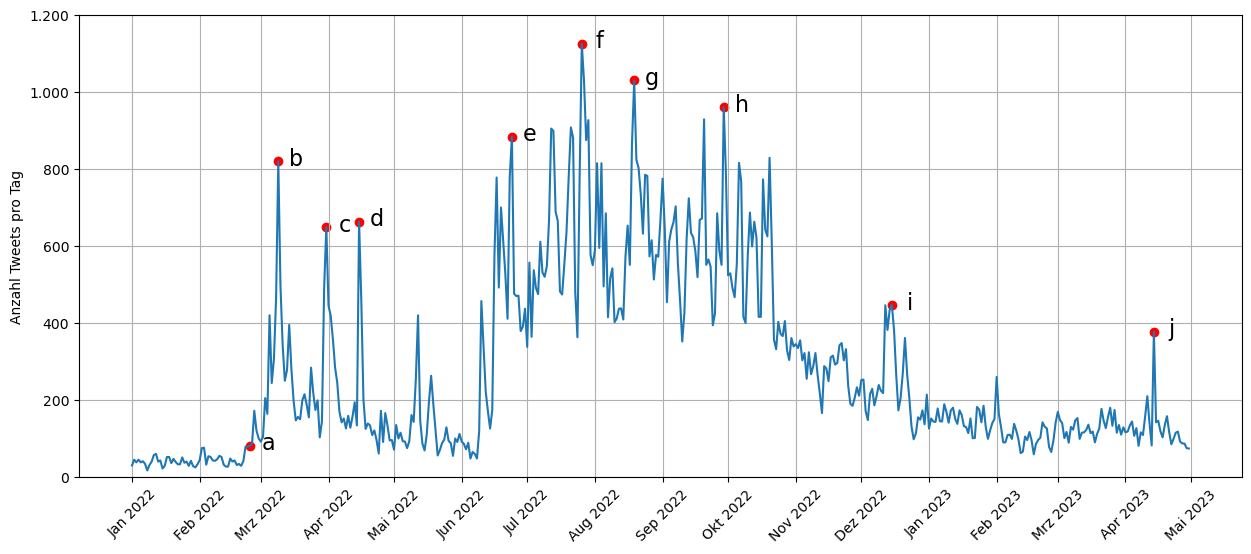

In [83]:
import matplotlib.pyplot as plt
import locale
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Set the locale to German
locale.setlocale(locale.LC_ALL, 'de_DE')

fig, ax = plt.subplots(figsize=(15, 6))

# Convert the 'date' column to a datetime object
corpus_per_day_2022['date'] = pd.to_datetime(corpus_per_day_2022['date'])

ax.plot(corpus_per_day_2022['date'], corpus_per_day_2022['count'])

# Set the x-ticks 
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Setting labels and title
# ax.set_xlabel('Year')
ax.set_ylabel('Anzahl Tweets pro Tag')


def format_thousands(x, pos):
    return locale.format_string('%.0f', x, grouping=True)

ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))

# set upper limit of y-axis to 1200
ax.set_ylim(0, 1200)

ax.grid(True)



# Add vertical lines at event dates
import sys, importlib
importlib.reload(sys.modules['events'])
from events import event_list
# Add red dots for events
event_dates = [event[0] for event in event_list]
event_descriptions = [event[1] for event in event_list]
event_counts = [corpus_per_day_2022.loc[corpus_per_day_2022['date'] == date, 'count'].values[0] for date in event_dates]
ax.scatter(event_dates, event_counts, c='red')

# Add labels for events
for i, date in enumerate(event_dates):
    count = event_counts[i]
    ax.annotate(chr(ord('a') + i), (date, count), xytext=(13, 10), textcoords='offset points', fontsize=16,ha='center', va='top', color='black')

ax.grid(True)

# Displaying the plot
plt.show()

In [66]:
# calculate biggest peak

# Assuming you have a dataframe called 'tweets_df' with columns ['date', 'category', 'count']

# Sort the dataframe by date and category
corpus_per_day_category_2022 = corpus_per_day_category_2022.sort_values(['date', 'category'])

# Create a new dataframe to store the differences
corpus_daily_tweets_differences = pd.DataFrame(columns=['date', 'category', 'difference'])

# Iterate over each category
for category in corpus_per_day_category_2022['category'].unique():
    # Filter the dataframe for the current category
    category_df = corpus_per_day_category_2022[corpus_per_day_category_2022['category'] == category]
    
    # Calculate the differences between counts and store them in the differences dataframe
    differences = category_df['count'].diff(periods=1)
    corpus_daily_tweets_differences = corpus_daily_tweets_differences.append(pd.DataFrame({'date': category_df['date'], 'category': category, 'difference': differences}))
    

                  date  difference
category                          
Regulär     2023-04-30       311.0
Spam        2023-04-30       558.0
enthält URL 2023-04-30       275.0


C:\Users\c.loschke\AppData\Local\Temp\ipykernel_28608\4034287203.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\c.loschke\AppData\Local\Temp\ipykernel_28608\4034287203.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\c.loschke\AppData\Local\Temp\ipykernel_28608\4034287203.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [37]:
# calculate biggest peak of corpus_per_day_2022
differences = corpus_per_day_2022['count'].diff(periods=1)
corpus_per_day_2022['differences'] = differences

In [67]:
# calculate mean of count between 2022-06-16 and 2022-10-22
mean_df = corpus_per_day_category_2022[corpus_per_day_category_2022['date'] >= '2022-06-16']
mean_df = mean_df[mean_df['date'] <= '2022-10-22']
mean_df = mean_df.groupby([mean_df["category"]]).mean().reset_index()
mean_df = mean_df.rename(columns={"count": "mean_count"})


In [12]:
# 7. plot daily tweets since 2022 input_corpus (only http + regular)

fig = px.line(input_corpus_per_day, x="date", y="count", 
              #color_discrete_sequence=px.colors.qualitative.Plotly,
              #color_discrete_map={"spam": '#DE4A4A', "http": '#7f7f7f', "regular": '#1f77b4'}
              color_discrete_map= {f'{spam}': 'rgb(255,0,0)', f'{http}': '#7f7f7f', f'{regular}': 'rgb(0,0,255)'}
              )

# change colors of lines
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified")
fig.update_layout(title=f'Anzahl Tweets pro Tag 2022-2023 (ohne Spam)', title_font_size=20)
fig.update_xaxes(title_text="", title_font=dict(size=15), nticks=20, tickfont=dict(size=15))
fig.update_yaxes(title_text="Tweets pro Tag", title_font=dict(size=15), nticks=5, tickfont=dict(size=15))


# update layout of legend to make it more readable
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01,
    title='Kategorie',
    bgcolor="rgba(0,0,0,0)",
    font=dict(
        size=15
    )
))


fig.show()
fig.write_html("../data/html_plots/input_corpus_per_day.html")


In [13]:
# access week numbers
input_corpus['datetime'] = pd.to_datetime(input_corpus['datetime'])
input_corpus['week_year'] = input_corpus['datetime'].apply(lambda x: f"{x.week}-{x.year}")

# fix week 52 of 2021 and 2022
input_corpus.loc[(input_corpus['year_month'] == '2022-01') & (input_corpus['datetime'].dt.isocalendar().week == 52), 'week_year'] = '52-2021'
input_corpus.loc[(input_corpus['year_month'] == '2023-01') & (input_corpus['datetime'].dt.isocalendar().week == 52), 'week_year'] = '52-2022'

# aggregate all tweets per week
input_corpus_per_week = input_corpus.groupby(['week_year']).size().reset_index(name="count")

# sort by week_year
input_corpus_per_week["year"] = input_corpus_per_week["week_year"].str.split("-", n = 1, expand = True)[1]
input_corpus_per_week["week"] = input_corpus_per_week["week_year"].str.split("-", n = 1, expand = True)[0]
# convert year and week to int
input_corpus_per_week["year"] = input_corpus_per_week["year"].astype(int)
input_corpus_per_week["week"] = input_corpus_per_week["week"].astype(int)

# sort by year first and then by week
input_corpus_per_week = input_corpus_per_week.sort_values(by=['year', 'week']).reset_index(drop=True)

C:\Users\c.loschke\AppData\Local\Temp\ipykernel_28608\1639541803.py:3: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [14]:
# 8. plot weekly tweets since 2022 input_corpus (only http + regular)

fig = px.line(input_corpus_per_week, x="week_year", y="count")

# change colors of lines
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified")
fig.update_layout(title=f'Anzahl Tweets je Kalenderwoche 2022-2023 (ohne Spam)', title_font_size=20)
fig.update_xaxes(title_text="", title_font=dict(size=15), nticks=20, tickfont=dict(size=15))
fig.update_yaxes(title_text="Tweets pro Woche", title_font=dict(size=15), nticks=5, tickfont=dict(size=15))


# update layout of legend to make it more readable
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01,
    title='Kategorie',
    bgcolor="rgba(0,0,0,0)",
    font=dict(
        size=15
    )
))


fig.show()
fig.write_html("../data/html_plots/input_corpus_per_week.html")